In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')

In [2]:
bank_files=pd.read_csv("C:\\Users\\JOTHISH N\\Desktop\\DS\\linear regression\\bank-full.csv",sep=';')

In [3]:
bank_files

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [4]:
bank_files.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [5]:
bank_files[bank_files.duplicated()]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y


In [6]:
bank_files.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [7]:
bank_files.job.value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

In [8]:
bank_files.default.value_counts()

no     44396
yes      815
Name: default, dtype: int64

<AxesSubplot:>

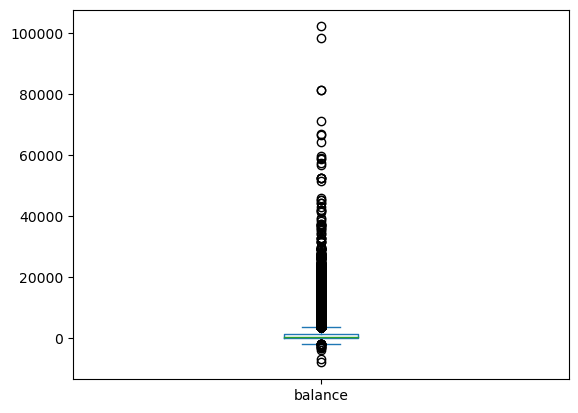

In [9]:
bank_files.balance.plot(kind='box')

In [10]:
bank_files[bank_files.balance>90000]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
26227,59,management,married,tertiary,no,98417,no,no,telephone,20,nov,145,5,-1,0,unknown,no
39989,51,management,single,tertiary,no,102127,no,no,cellular,3,jun,90,1,-1,0,unknown,no


In [11]:
bank_files.contact.value_counts()

cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64

In [12]:
bank_files.default.value_counts()

no     44396
yes      815
Name: default, dtype: int64

In [13]:
bank_files.default[bank_files['default']=='no']=0
bank_files.default[bank_files['default']=='yes']=1

In [14]:
bank_files.default.value_counts()

0    44396
1      815
Name: default, dtype: int64

In [15]:
bank_files.housing.value_counts()

yes    25130
no     20081
Name: housing, dtype: int64

In [16]:
bank_files.housing[bank_files['housing']=='no']=0
bank_files.housing[bank_files['housing']=='yes']=1

In [23]:
bank_files.housing.value_counts()

1    25130
0    20081
Name: housing, dtype: int64

In [24]:
bank_files.loan.value_counts()

no     37967
yes     7244
Name: loan, dtype: int64

In [25]:
bank_files.loan[bank_files['loan']=='no']=0
bank_files.loan[bank_files['loan']=='yes']=1

In [26]:
bank_files.loan.value_counts()

0    37967
1     7244
Name: loan, dtype: int64

In [27]:
bank_files

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,gement,married,tertiary,0,2144,1,0,unknown,5,may,261,1,-1,0,unknown,no
1,44,nician,single,secondary,0,30,1,0,unknown,5,may,151,1,-1,0,unknown,no
2,33,epreneur,married,secondary,0,3,1,1,unknown,5,may,76,1,-1,0,unknown,no
3,47,-collar,married,unknown,0,1507,1,0,unknown,5,may,92,1,-1,0,unknown,no
4,33,own,single,unknown,0,2,0,0,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,nician,married,tertiary,0,826,0,0,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,red,divorced,primary,0,1730,0,0,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,red,married,secondary,0,5716,0,0,cellular,17,nov,1127,5,184,3,success,yes
45209,57,-collar,married,secondary,0,669,0,0,telephone,17,nov,508,4,-1,0,unknown,no


In [28]:
bank_files.y[bank_files['y']=='no']=0
bank_files.y[bank_files['y']=='yes']=1

In [29]:
bank_files

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,gement,married,tertiary,0,2144,1,0,unknown,5,may,261,1,-1,0,unknown,0
1,44,nician,single,secondary,0,30,1,0,unknown,5,may,151,1,-1,0,unknown,0
2,33,epreneur,married,secondary,0,3,1,1,unknown,5,may,76,1,-1,0,unknown,0
3,47,-collar,married,unknown,0,1507,1,0,unknown,5,may,92,1,-1,0,unknown,0
4,33,own,single,unknown,0,2,0,0,unknown,5,may,198,1,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,nician,married,tertiary,0,826,0,0,cellular,17,nov,977,3,-1,0,unknown,1
45207,71,red,divorced,primary,0,1730,0,0,cellular,17,nov,456,2,-1,0,unknown,1
45208,72,red,married,secondary,0,5716,0,0,cellular,17,nov,1127,5,184,3,success,1
45209,57,-collar,married,secondary,0,669,0,0,telephone,17,nov,508,4,-1,0,unknown,0


In [30]:
bank_files.month.value_counts()

may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: month, dtype: int64

In [31]:
X=bank_files.iloc[:,0:-1]
Y=bank_files.iloc[:,-1]

In [32]:
X

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,58,gement,married,tertiary,0,2144,1,0,unknown,5,may,261,1,-1,0,unknown
1,44,nician,single,secondary,0,30,1,0,unknown,5,may,151,1,-1,0,unknown
2,33,epreneur,married,secondary,0,3,1,1,unknown,5,may,76,1,-1,0,unknown
3,47,-collar,married,unknown,0,1507,1,0,unknown,5,may,92,1,-1,0,unknown
4,33,own,single,unknown,0,2,0,0,unknown,5,may,198,1,-1,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,nician,married,tertiary,0,826,0,0,cellular,17,nov,977,3,-1,0,unknown
45207,71,red,divorced,primary,0,1730,0,0,cellular,17,nov,456,2,-1,0,unknown
45208,72,red,married,secondary,0,5716,0,0,cellular,17,nov,1127,5,184,3,success
45209,57,-collar,married,secondary,0,669,0,0,telephone,17,nov,508,4,-1,0,unknown


In [33]:
Z=pd.get_dummies(columns=['education','job','marital','contact','poutcome'],data=X)

In [34]:
Z.month.value_counts()

may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: month, dtype: int64

In [35]:
Z.month[Z.month=='jan']=1
Z.month[Z.month=='feb']=2
Z.month[Z.month=='mar']=3
Z.month[Z.month=='apr']=4
Z.month[Z.month=='may']=5
Z.month[Z.month=='jun']=6
Z.month[Z.month=='jul']=7
Z.month[Z.month=='aug']=8
Z.month[Z.month=='sep']=9
Z.month[Z.month=='oct']=10
Z.month[Z.month=='nov']=11
Z.month[Z.month=='dec']=12

In [36]:
Y

0        0
1        0
2        0
3        0
4        0
        ..
45206    1
45207    1
45208    1
45209    0
45210    0
Name: y, Length: 45211, dtype: object

In [37]:
Z=Z.astype({'default':int,'housing':int,'loan':int,'month':int})

In [38]:
Y=Y.astype(int)

In [39]:
Y.value_counts()

0    39922
1     5289
Name: y, dtype: int64

In [40]:
bank_files.y.value_counts()

0    39922
1     5289
Name: y, dtype: int64

In [41]:
classifier=LogisticRegression()
classifier.fit(Z,Y)

LogisticRegression()

In [42]:
classifier.score(Z,Y)

0.8892304970029418

In [43]:
Z1=Z.drop(['day','month'],axis=1)
Z2=Z.drop(['pdays'],axis=1)

In [44]:
classifier1=LogisticRegression()
classifier1.fit(Z1,Y)

LogisticRegression()

In [45]:
classifier1.score(Z1,Y)

0.8917077702329079

In [46]:
classifier2=LogisticRegression()
classifier2.fit(Z2,Y)

LogisticRegression()

In [47]:
classifier2.score(Z2,Y)

0.8905354891508703

In [48]:
import matplotlib.pyplot as plt 
from matplotlib.colors import ListedColormap 
import pandas as pd 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [49]:
Z_train, Z_test, Y_train, Y_test = train_test_split(Z,Y, test_size=0.2, random_state=0)
Z1_train, Z1_test, Y_train, Y_test = train_test_split(Z1,Y, test_size=0.2, random_state=0)
Z2_train, Z2_test, Y_train, Y_test = train_test_split(Z2,Y, test_size=0.2, random_state=0)

In [50]:
classifier3=LogisticRegression()
classifier3.fit(Z_train,Y_train)

LogisticRegression()

In [51]:
classifier3.score(Z_train,Y_train)

0.8901238664012386

In [52]:
Y_pred=classifier3.predict(Z_test)

In [53]:
print(accuracy_score(Y_test,Y_pred))

0.8866526595156474


In [54]:
classifier4=LogisticRegression()
classifier4.fit(Z1_train,Y_train)
classifier5=LogisticRegression()
classifier5.fit(Z2_train,Y_train)

LogisticRegression()

In [55]:
classifier4.score(Z1_train,Y_train)
Y1_pred=classifier4.predict(Z1_test)
print(accuracy_score(Y_test,Y1_pred))

0.8880902355413026


In [56]:
classifier5.score(Z2_train,Y_train)
Y2_pred=classifier5.predict(Z2_test)
print(accuracy_score(Y_test,Y2_pred))

0.8877584872276899


In [57]:
bank_files.pdays.value_counts()

-1      36954
 182      167
 92       147
 91       126
 183      126
        ...  
 449        1
 452        1
 648        1
 595        1
 530        1
Name: pdays, Length: 559, dtype: int64

In [58]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

In [59]:
Z_train_normal=scale(Z_train)

In [60]:
Z_train_normal

array([[ 1.51506117, -0.13601952, -0.23163698, ..., -0.20517128,
        -0.18404781,  0.47153594],
       [-0.36959746, -0.13601952,  0.10603762, ..., -0.20517128,
        -0.18404781,  0.47153594],
       [-0.55806332, -0.13601952,  0.47063537, ..., -0.20517128,
        -0.18404781, -2.12072912],
       ...,
       [-0.55806332, -0.13601952, -0.34030268, ..., -0.20517128,
        -0.18404781,  0.47153594],
       [ 2.74008927, -0.13601952, -0.24526074, ..., -0.20517128,
        -0.18404781, -2.12072912],
       [ 0.47849892, -0.13601952, -0.42658649, ..., -0.20517128,
        -0.18404781,  0.47153594]])

In [61]:
pca=PCA()

In [62]:
pca_values=pca.fit_transform(Z_train_normal)

In [63]:
pca_values

array([[-2.39681737e-01,  1.64963604e-01, -3.84349388e-01, ...,
         4.41889163e-15,  3.79090208e-15, -2.90943302e-15],
       [-1.85317812e+00,  2.90510179e-01,  1.19394393e+00, ...,
         1.95503565e-15,  2.03061951e-15, -3.40712881e-15],
       [ 3.00817925e+00,  1.16935676e+00, -1.21002035e+00, ...,
         2.86689711e-15, -6.44468745e-16, -1.04441899e-15],
       ...,
       [ 8.81009078e-02, -2.23748777e+00,  9.34379903e-01, ...,
        -4.26510141e-18,  4.21593490e-17, -5.09430613e-17],
       [ 2.72091308e+00,  2.13922193e+00,  2.76048975e+00, ...,
        -1.35919961e-16,  1.01714784e-16, -1.27552707e-16],
       [-1.61188890e+00,  1.20751069e+00, -1.94356331e+00, ...,
        -1.29629154e-16,  1.04895395e-16, -1.03429593e-16]])

In [64]:
var=pca.explained_variance_ratio_

In [65]:
var

array([9.24533396e-02, 7.00847063e-02, 6.60006169e-02, 5.02219390e-02,
       4.29444260e-02, 3.99436594e-02, 3.66042494e-02, 3.38825391e-02,
       3.16101239e-02, 3.14516825e-02, 3.02030841e-02, 2.95666383e-02,
       2.94398212e-02, 2.87147168e-02, 2.83469241e-02, 2.81288235e-02,
       2.77777917e-02, 2.77133479e-02, 2.64516147e-02, 2.55107338e-02,
       2.50494794e-02, 2.47866975e-02, 2.37028816e-02, 2.25302325e-02,
       2.22327875e-02, 2.11048753e-02, 2.03213554e-02, 1.87083711e-02,
       1.71376742e-02, 1.22969719e-02, 1.09727804e-02, 4.10511505e-03,
       1.82332063e-32, 7.82783961e-33, 4.53917868e-33, 2.06833395e-33,
       1.42447385e-33])

In [66]:
import numpy as np
varsa=np.cumsum(var)

In [67]:
varsa

array([0.09245334, 0.16253805, 0.22853866, 0.2787606 , 0.32170503,
       0.36164869, 0.39825294, 0.43213548, 0.4637456 , 0.49519728,
       0.52540037, 0.554967  , 0.58440683, 0.61312154, 0.64146847,
       0.66959729, 0.69737508, 0.72508843, 0.75154004, 0.77705078,
       0.80210026, 0.82688695, 0.85058984, 0.87312007, 0.89535286,
       0.91645773, 0.93677909, 0.95548746, 0.97262513, 0.9849221 ,
       0.99589488, 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        ])

In [68]:
bank_files.job.value_counts()

-collar      9732
gement       9458
nician       7597
n.           5171
ices         4154
red          2264
-employed    1579
epreneur     1487
ployed       1303
emaid        1240
ent           938
own           288
Name: job, dtype: int64

In [69]:
bank_files[bank_files.job=='blue-collar'].y.value_counts()

Series([], Name: y, dtype: int64)

In [70]:
classifier1

LogisticRegression()

In [71]:
bank_files[['job','y']].groupby(['y']).count()

,job
y,
0,39922
1,5289


In [72]:
bank_files.groupby('job')

In [75]:
df=pd.crosstab(bank_files['y'],bank_files['job'])

In [76]:
import scipy.stats as stats

In [77]:
df

job,-collar,-employed,emaid,ent,epreneur,gement,ices,n.,nician,own,ployed,red
y,,,,,,,,,,,,
0,9024,1392,1131,669,1364,8157,3785,4540,6757,254,1101,1748
1,708,187,109,269,123,1301,369,631,840,34,202,516


In [78]:
df2=df.iloc[:,[2,3,7]]

In [79]:
stats.chi2_contingency(df2)

(212.67699983723062,
 6.573191295641804e-47,
 2,
 array([[1069.75098653,  809.21485916, 4461.03415431],
        [ 170.24901347,  128.78514084,  709.96584569]]))

In [80]:
for i in bank_files.index:
    bank_files.balance[i]=bank_files.balance[i]+1

In [81]:
bank_files.job=bank_files.job.apply(lambda x:x[4:])

In [82]:
bank_files.job

0          nt
1          an
2        neur
3         lar
4            
         ... 
45206      an
45207        
45208        
45209     lar
45210    neur
Name: job, Length: 45211, dtype: object

In [83]:
a='    3242343      '
int(a)

3242343

In [84]:
bank_files.job.value_counts()

         12815
lar       9732
nt        9458
an        7597
loyed     1579
neur      1487
ed        1303
d         1240
Name: job, dtype: int64